[0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

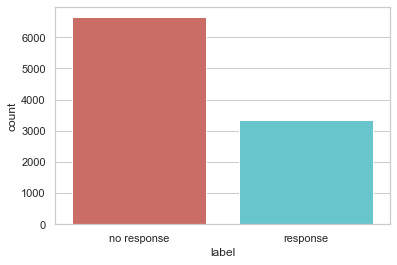

no response 6640
response 3360
percentage of no response is 66.4
percentage of response 33.6
                   age      zip_code      earnings
label                                             
no response  36.608283  57288.643976  81014.592018
response     52.925000  51153.604167  93881.281250
married    5032
single     4968
Name: family_status, dtype: int64
                 age      zip_code      earnings
lifestyle                                       
active     42.197926  55446.325630  85134.944889
cozily     41.916916  55323.534668  85228.640466
healthy    42.157670  54903.571211  85657.982922
                 age      zip_code      earnings
car                                             
expensive  41.996161  55367.477066  85608.998384
practical  42.183330  55089.895466  85072.077410
                     age      zip_code      earnings
family_status                                       
married        41.867647  55252.405405  85815.654412
single         42.316626  55201.81199

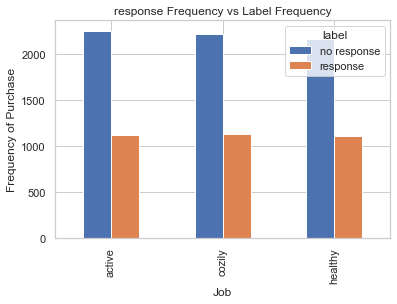

<Figure size 432x288 with 0 Axes>

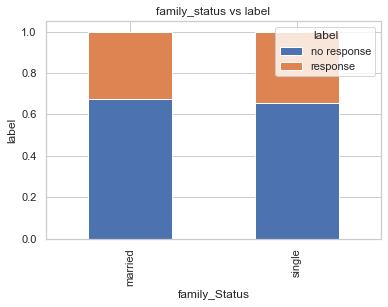

<Figure size 432x288 with 0 Axes>

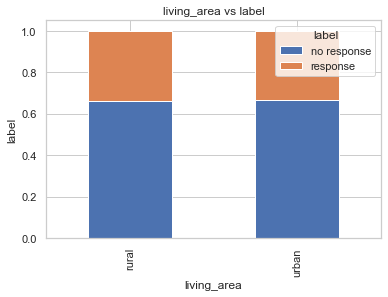

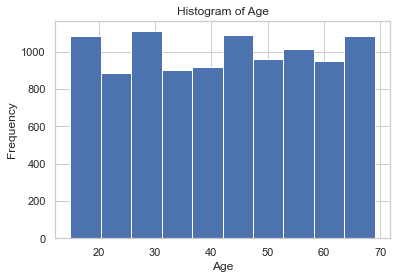

<Figure size 432x288 with 0 Axes>

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


dataframe=pd.read_csv("C:/Users/surab/OneDrive/Desktop/Recruiting_Task/Recruiting_Task/Recruiting_Task_InputData.csv")

age= dataframe["age"]
labels=dataframe["label"]


new_labels=[]
for i in labels:

    if i=="response":
        new_labels.append(1)
    else:
        new_labels.append(0)

print(new_labels)

print(dataframe["label"].value_counts())

sns.countplot(x="label", data = dataframe, palette="hls")
plt.show()

count_no_res = len(dataframe[dataframe['label']== "no response"])
print("no response",count_no_res)
count_res = len(dataframe[dataframe['label']=="response"])
print("response",count_res)
pct_of_no_res = count_no_res/(count_no_res+count_res)
print("percentage of no response is", pct_of_no_res*100)
pct_of_res = count_res/(count_no_res+count_res)
print("percentage of response", pct_of_res*100)

print(dataframe.groupby("label").mean())
print(dataframe["family_status"].value_counts())
print(dataframe.groupby("lifestyle").mean())
print(dataframe.groupby("car").mean())
print(dataframe.groupby("family_status").mean())
print(dataframe.groupby("living_area").mean())

pd.crosstab(dataframe.lifestyle,dataframe.label).plot(kind='bar')
plt.title('response Frequency vs Label Frequency')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()
plt.savefig('label_vs_response')

table=pd.crosstab(dataframe.family_status,dataframe.label)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('family_status vs label')
plt.xlabel('family_Status')
plt.ylabel('label')
plt.show()
plt.savefig('family_status_vs_label')


table=pd.crosstab(dataframe.living_area,dataframe.label)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('living_area vs label')
plt.xlabel('living_area')
plt.ylabel('label')
plt.show()
plt.savefig('living_area_vs_label')

dataframe.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.savefig('hist_age')